tree.py does not generalize to feed forward NN - new script -> ffnn.py.

In [10]:
# Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.inspection import permutation_importance

# OOP
from ffnn import FFNN

# ===== import data; tr,ts ======
X_tr = pd.read_csv('split-data/processed/X_tr.csv')
X_ts = pd.read_csv('split-data/processed/X_ts.csv')
y_tr = pd.read_csv('split-data/processed/y_tr.csv')
y_ts = pd.read_csv('split-data/processed/y_ts.csv')

os.makedirs('media/06_MLP', exist_ok=True)

In [2]:
model = FFNN(X_tr, X_ts, y_tr, y_ts)

param_grid = {
    'hidden_layer_sizes': [
        (50,), (100,), (150,),
        (50, 50), (100, 50), (100, 100),
        (200,), (200, 100)
    ],
    'activation': ['relu', 'logistic'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.0005, 0.001, 0.002, 0.005, 0.01],
    'random_state': [42, 1234]
}

model.grid_search_CV(param_grid, epochs=500, early_stopping=False)

Fitting 2 folds for each of 320 candidates, totalling 640 fits
Elapsed Time: 325.14 seconds


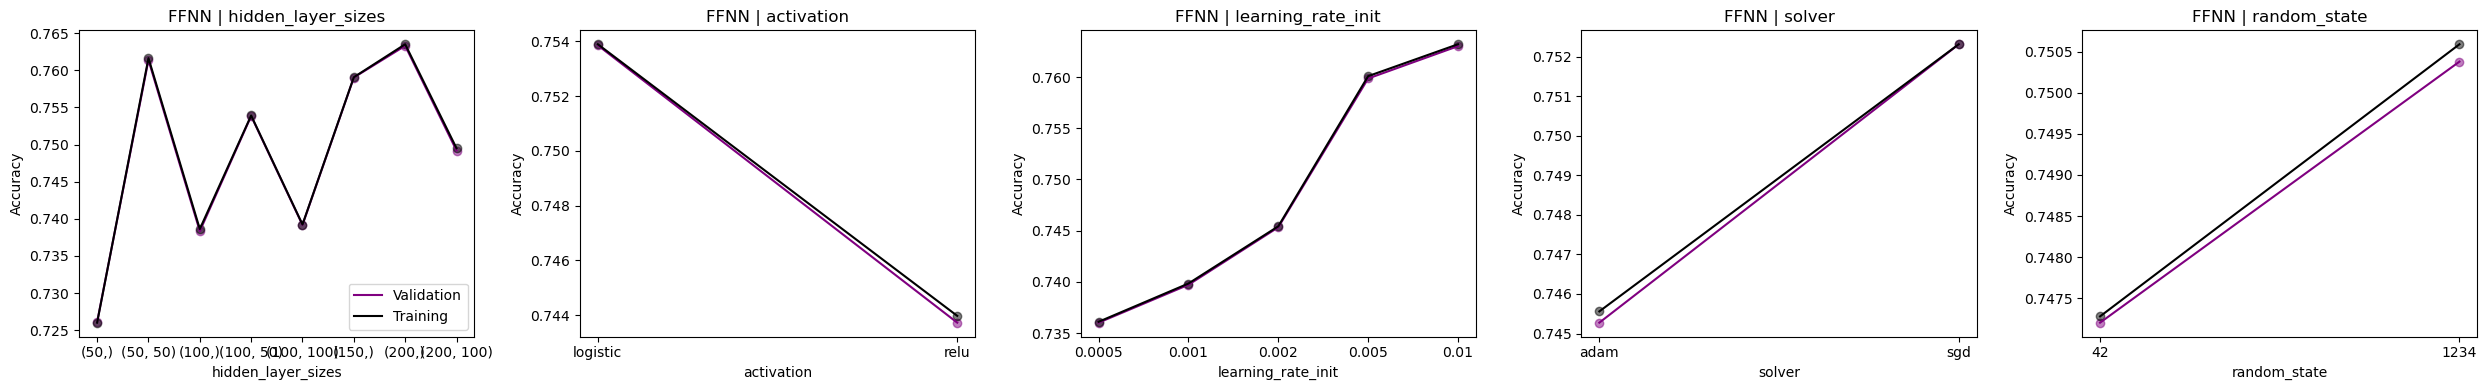

FFNN - Hyperparameters: ['activation', 'hidden_layer_sizes', 'learning_rate_init', 'random_state', 'solver']
Train Accuracy: 80.495%
CV Validation Accuracy: 84.384%
Test Accuracy: 80.538%
Best Hyperparameters: {'activation': 'relu', 'hidden_layer_sizes': (150,), 'learning_rate_init': 0.005, 'random_state': 42, 'solver': 'adam'}


In [11]:
model.plot_all_validation_curves(model.grid_search, ['hidden_layer_sizes', 'activation', 'learning_rate_init', 'solver', 'random_state'], save_path='media/06_MLP/val_curve_across_hyperparam_acc')
model.report_test_performance(model.grid_search)

Loss (1-Accuracy).

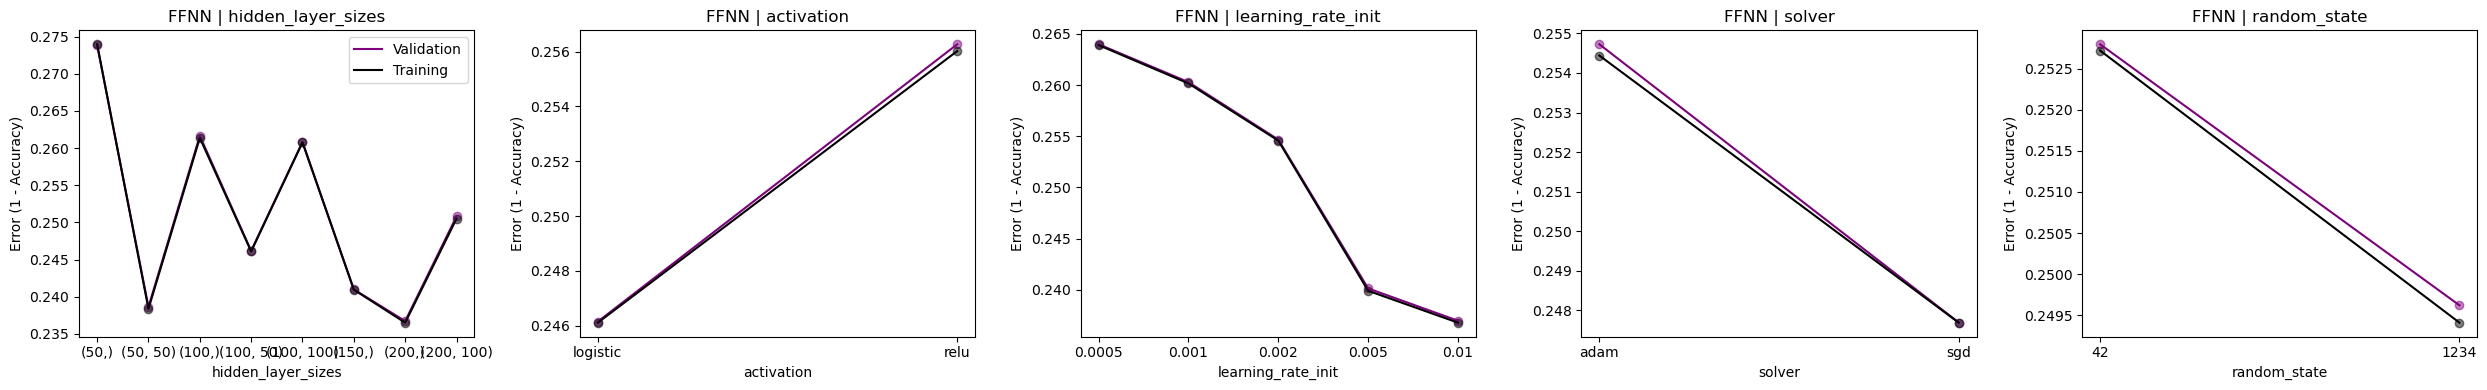

In [12]:
model.plot_all_validation_curves(model.grid_search, ['hidden_layer_sizes', 'activation', 'learning_rate_init', 'solver', 'random_state'], save_path='media/06_MLP/val_curve_across_hyperparam_loss', accuracy_plot=False)